# Lab 4 - OPTIMIZATION TECHNIQUES

**Group members**:

  
  Name 1 : **Leticia Martín Cabrera - 230781**
 
  Name 2 : **Júlia Ruiz Valero - 230308**

**Goal of the practical session**:

<font color="blue"> In this practical session we will solve three optimization problems, which will be constrained to one or some equalities and inequalities. The first one will be the Toy Problem, the second one the Water-Filling Problem and finally we will work with the Entropy Maximization Problem.


**Introduction of the topic**:

<font color="blue"> From theory, we know that constrained optimization is used when we impose conditions on the optimum in order to obtain a solution for our real problem. A general constrained optimization problem could be written as follows:

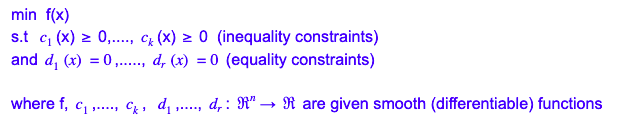

## **1. Karush-Kuhn-Tucker (KKT) optimally conditions**

**Summary of the topic and use of KKT optimally conditions**: 

<font color="blue"> We know that the method of Lagrange Multipliers is used to find a solution with constraints of one or more equalities. However, when we also have inequalities in the constraints, it is necessary to use the KKT conditions method.

<font color="blue"> Once we have found the minimum of a convex function with convex restrictions on its variables, we need to check if these solutions satisfy these KKT optimally conditions and will also allow us to write the equations to compute them. 

<font color="blue"> The Karush-Kuhn-Tucker (KKT) optimally conditions will be necessary and sufficient conditions of a minimum. These conditions are the following ones:

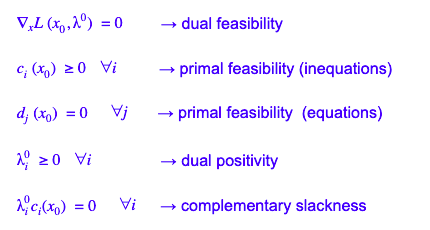 


## 1.1.  TOY PROBLEM



-Sketch the set of constrains of the problem and the level lines of the objective function.

-Guess from your sketch the solution of the problem.

-Find the solution using the function *scipy.optimize.minimize* from Python.

-Write the KKT optimality conditions and check if the minimum satisfy these
conditions. Find the solution of the dual variable/s from the KKT conditions.

<font color="blue"> For this part of the lab, we will consider the function defined by f(x<sub>1</sub>, x<sub>2</sub>)= x<sub>2</sub> and the problem:

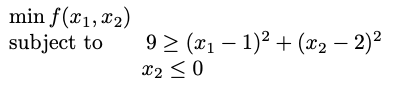

<font color="blue"> In order to sketch the set of constrains of the problem and the level lines of our objective function, we will use *Desmos*. The set of constraints of the problem are represented in purple. In order to plot the level lines (represented in red), it will be  necessary to equal the objective function to k, that is, f(x<sub>1</sub>, x<sub>2</sub>)= x<sub>2</sub> = k. We will give values to k and calculate the value of x<sub>2</sub>. In that case, we can cleary see that x<sub>2</sub> gets always the same value as k, so the level lines will be constant functions. 

<font color="blue">Finally, the resulting plot and the region which we are interested in is the following one:

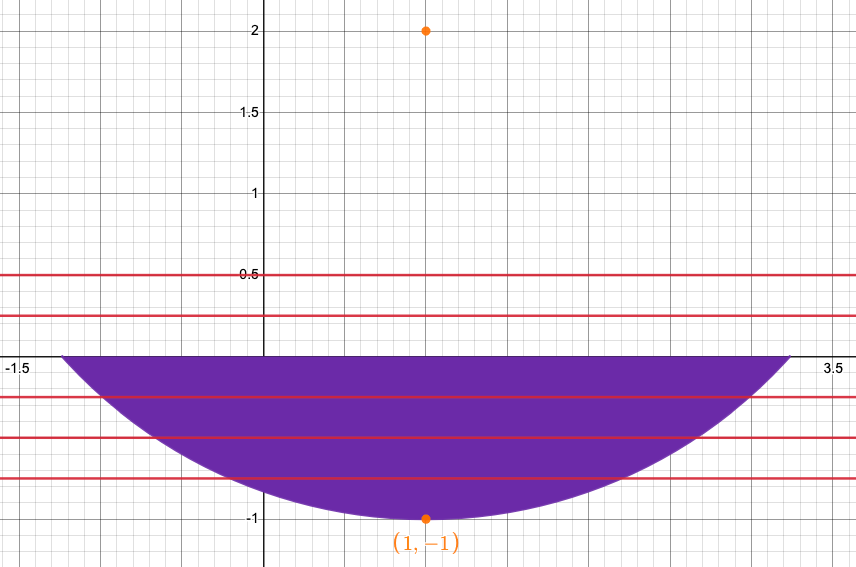

<font color="blue"> We know that a real-valued function defined on a domain X has a minimum at x*  if f(x*) ≤ f(x) for all x in that domain. So, according to that, we can clearly see in the plot that the solution for this problem is the point (1,-1), as it is the smallest value in the whole range of the function.

<font color="blue"> Now, let's calculate the solution with the *spicy.optimize* function in Python, which will help us to know if we are right with our previous statement:

In [18]:
import numpy as np
from scipy.optimize import minimize

<font color="blue"> Let's define our objective functions and both constraints:

In [19]:
def objective (x): 
  return x[1] #returns the second position of the vector x

def constraint_1 (x):
  return (-(x[0] - 1)**2 - (x[1] - 2)**2 + 9) #returns the value of the first constraint

def constraint_2 (x):
  return -(x[1]) #returns the value of the second constraint

In [20]:
con1 = {'type': 'ineq', 'fun': constraint_1}
con2 = {'type': 'ineq', 'fun': constraint_2}
cons = ([con1,con2])

x0 = [1, -1] #initial guess

solution = minimize (objective, x0, method = 'SLSQP', constraints = cons)
x = solution.x

print ("TOY-PROBLEM \nThe solution is:", x)

TOY-PROBLEM 
The solution is: [ 1. -1.]


<font color="blue"> **KKT optimally conditions**

<font color="blue"> The KKT optimally conditions for the Toy Problem are the following:


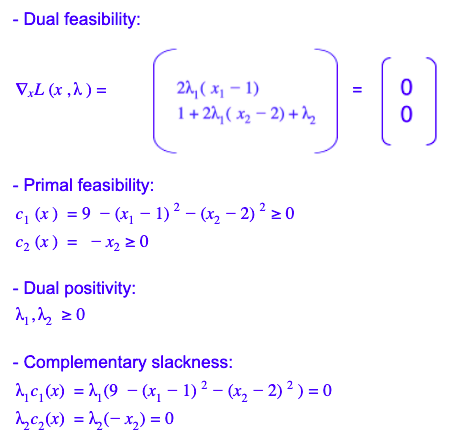




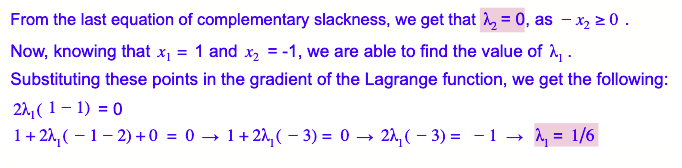

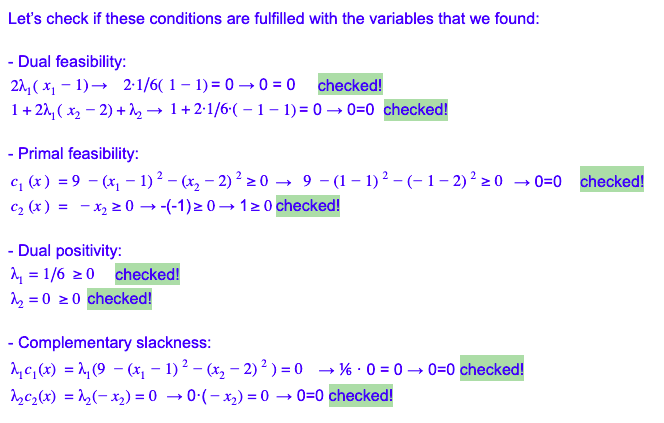

**Our conclusion**:

<font color="blue"> We have already checked we were not wrong with our initial guess of the solution. We found the values of both lambdas: lambda_1 = 1/6 and lambda_2 = 0. Furthermore, we can also see that the minimum satisfies the KKT optimally conditions.

## 1.1. WATER-FILLING

-Find the solution using the function *scipy.optimize.minimize* from Python 
of a network with four communication channels and the case (1) where the noise is random and between 0 and 0.25 or (2) the noise is equal in each communication channel. Comment each case.

-Write the KKT optimality conditions and check if the minimum satisfy these
conditions. Find the solution of the dual variable/s from the KKT conditions.

<font color="blue"> Assuming that a network has *n* communication channels,  our goal in this problem is to allocate a total power of one to the channels, in order to maximize the total
communication rate.

<font color="blue"> The variables are the following ones:
 
 <font color="blue">- x<sub>i</sub>, which represents the capacity or transmitter power allocated to the i-th channel.

<font color="blue"> - α<sub>i</sub>, which represents a certain level of noise.  

<font color="blue"> And the convex optimization problem to consider is:

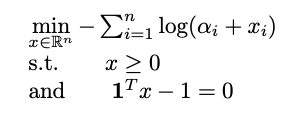


####RANDOM NOISE CASE:

<font color="blue"> Let's define our objective functions and both constraints:

In [21]:
def objective (x,alpha):
  return -(sum(np.log(alpha + x))) #returns the negative value of the sum of the value of the logarithm of (alpha+x)

def constraint_1 (x):
  return x            #returns the vector x

def constraint_2 (x):
 return (sum(x) - 1)  #returns the sum of all the elements of the vector x minus 1

In [23]:
#defining alpha
alpha_1 = np.random.random (4) * 0.25
print("Random noise alphas:", alpha_1)

Random noise alphas: [0.14519997 0.06662367 0.04754805 0.24851351]


In [24]:
con1 = {'type': 'ineq', 'fun': constraint_1}
con2 = {'type': 'eq', 'fun': constraint_2}
cons = ([con1, con2])

x0 = [0.5, 0.3, 0.1, 0.1]  #initial guess

solution_1 = minimize (objective, x0, args = (alpha_1), method = 'SLSQP', constraints = cons)
x = solution_1.x
print("RANDOM NOISE \nThe solution is:", np.round (x, decimals = 3))

RANDOM NOISE 
The solution is: [0.232 0.31  0.329 0.128]


####EQUAL NOISE CASE:

<font color="blue"> The objective function and its constraints are already defined above. The only thing that changes in this second case is the value of alpha:

In [ ]:
#defining alpha
alpha_2 = np.array ([0.25] * 4)
print("Equal noise alphas:", alpha_2)

Equal noise alphas: [0.25 0.25 0.25 0.25]


In [ ]:
solution_2 = minimize (objective, x0, args = (alpha_2), method = 'SLSQP', constraints = cons)
x = solution_2.x
print("EQUAL NOISE \nThe solution is:", np.round (x, decimals = 3))

EQUAL NOISE 
The solution is: [0.25 0.25 0.25 0.25]


<font color="blue"> Comparing both cases, we observe that in the first case the solution changes considerably every time we execute the program. That is due to the fact that we are taking random values for the alpha. On the other hand, for the equal noise, the solution is always the same at each iteration, with a constant value of 0.25 in the four positions of the array.

<font color="blue"> **KKT optimally conditions**

<font color="blue"> The KKT optimally conditions for the Water-filling problem are the following ones:

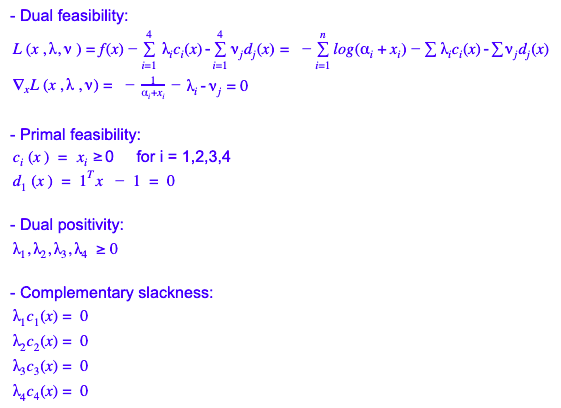


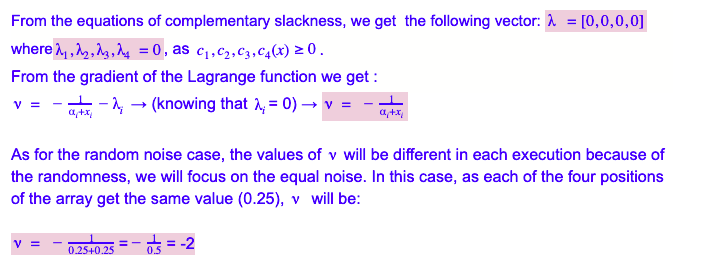

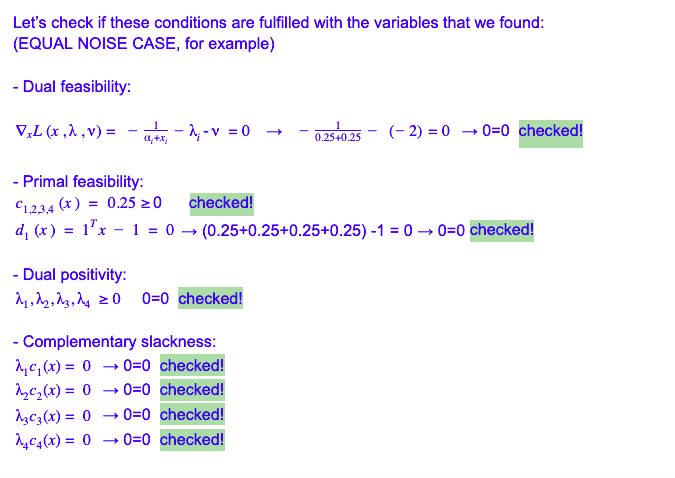

**Our conclusion**:

<font color="blue"> Although both cases give us different arrays, we can see that both solutions are coherent: when doing the total sum of the values of the array, we get a value 1, the maximum value for a probability. Furthermore, we have also checked that the minimum satisfies the KKT conditions.

## 1.3. ENTROPY MAXIMIZATION PROBLEM

-Find the solution using the function *scipy.optimize.minimize* from Python.

-Write the KKT optimality conditions and check if the minimum satisfy these
conditions. Find the solution of the dual variable/s from the KKT conditions.

<font color="blue"> The last constrained optimization problem to consider will be the following:

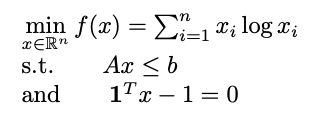

<font color="blue"> Let's define our variables:

In [ ]:
A = [[2,0],[0,3]]
b = [7,1]

<font color="blue"> Let's define our objective functions and both constraints:

In [ ]:
def objective (x):
  return (sum(x * np.log(x))) #returns the sum of the product of the vector x and its logarithm

def constraint_1 (x, A, b):
  return (b - np.matmul(A,x)) #returns the difference between the vector b and the product of the matrix A and the vector x

def constraint_2 (x):
  return (sum(x) - 1)  #returns the sum of all the elements of the vector x minus 1

In [ ]:
con1 = {'type': 'ineq', 'fun': constraint_1, 'args': (A, b)}
con2 = {'type': 'eq', 'fun': constraint_2}
cons = ([con1, con2])

x0 = [0.6, 0.4] #initial guess

solution = minimize (objective, x0, method = 'SLSQP', constraints = cons)

x = solution.x
print ("ENTROPY MAXIMIZATION PROBLEM \nThe solution is:", np.round(x, decimals = 3))

ENTROPY MAXIMIZATION PROBLEM 
The solution is: [0.667 0.333]


<font color="blue"> **KKT optimally conditions**

<font color="blue"> The KKT optimally conditions for the Entropy Maximization problem are the following ones:

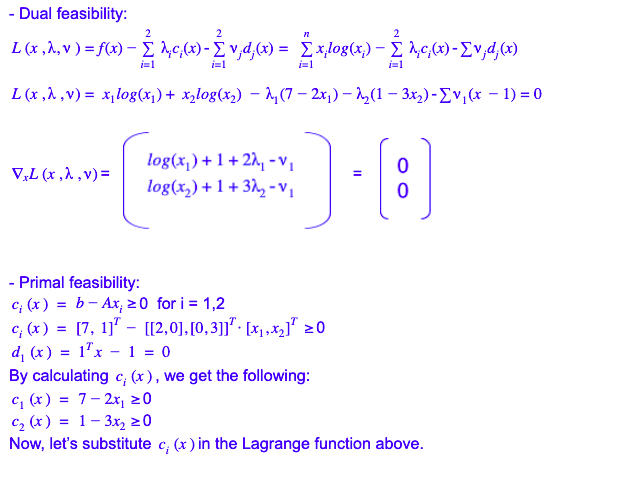

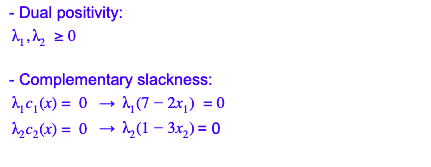

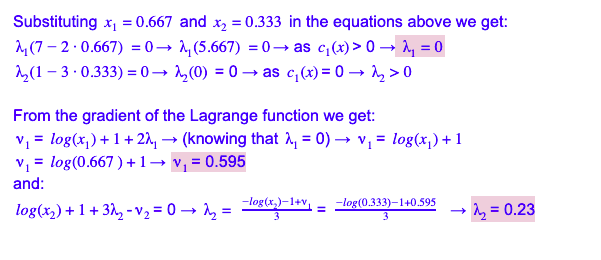

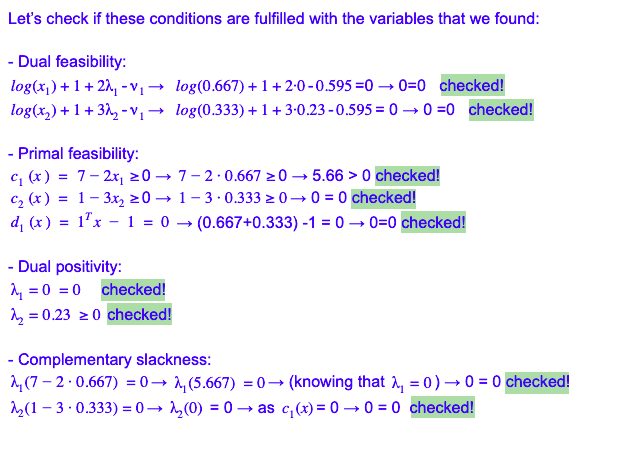

**Our conclusion**:

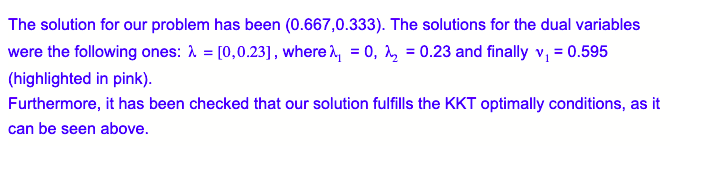